In [3]:
# Description: python program for finance that shows you how tocompute portfolio, simple returns and
#  daily returns and volatility.

# import libraries

from datetime import datetime
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
# Get the stock symbols for portfolio

stockSymbols = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG', 'TSLA', 'MSFT']


In [5]:
# Get the stock starting date

stockStartDate = '2013-01-01'

In [6]:
# Get today's date and format it YYYY-mm-dd

today = datetime.today().strftime('%Y-%m-%d')
# print(today)

In [7]:
# Get the # of assets for in the portfolio

numAssets = len(stockSymbols)
# print('You have '+ str(numAssets) + ' assets in the portfolio.')

In [8]:
# Create the function to get the stock prices

def getMyPortfolio(stocks=stockSymbols, start=stockStartDate, end=today, col='Adj Close'):
  data = web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]
  return data


In [9]:
# Get the stock porfolio Adj close 

my_stocks = getMyPortfolio(stockSymbols)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG,TSLA,MSFT
Date,,,,,,,
2013-01-02,28.000000,257.309998,68.502106,13.144286,360.274597,35.360001,23.297653
2013-01-03,27.770000,258.480011,67.637436,13.798572,360.483826,34.770000,22.985548
2013-01-04,28.760000,259.149994,65.753418,13.711429,367.607117,34.400002,22.555361
2013-01-07,29.420000,268.459991,65.366646,14.171429,366.003143,34.340000,22.513191
2013-01-08,29.059999,266.380005,65.542587,13.880000,365.280823,33.680000,22.395096
...,...,...,...,...,...,...,...
2020-07-06,240.279999,3057.040039,373.850006,493.809998,1495.699951,1371.579956,210.699997
2020-07-07,240.860001,3000.120117,372.690002,493.160004,1485.180054,1389.859985,208.250000
2020-07-08,243.580002,3081.110107,381.369995,502.779999,1496.000000,1365.880005,212.830002


In [10]:
# Create function to visualize the porfolio

def showGraphs(stocks=stockSymbols, start=stockStartDate, end=today, col='Adj Close'):
    # Create the title
    title = 'Portfolio ' + col + ' Price'
    my_stocks = getMyPortfolio(stocks=stocks, start=start, end=end, col=col)
    plt.figure(figsize=(12.2, 4.5))

    # Loop through each stock

    for c in my_stocks.columns.values:
        plt.plot(my_stocks[c], label=c)
        
    plt.title(title)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(col + ' Price USD ($)', fontsize=18)
    plt.legend(my_stocks.columns.values, loc='upper left')
    plt.show()

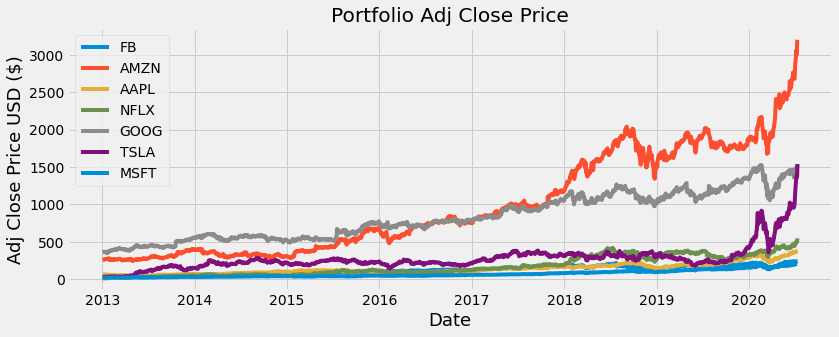

In [11]:
# Show the adjusted close price

showGraphs(stockSymbols)

In [12]:
# Calculate the simple returns

daily_simple_returns = my_stocks.pct_change(1)
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG,TSLA,MSFT
Date,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581,-0.016686,-0.013396
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760,-0.010641,-0.018716
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363,-0.001744,-0.001870
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974,-0.019220,-0.005246
...,...,...,...,...,...,...,...
2020-07-06,0.029389,0.057690,0.026750,0.035480,0.021165,0.134794,0.021526
2020-07-07,0.002414,-0.018619,-0.003103,-0.001316,-0.007033,0.013328,-0.011628
2020-07-08,0.011293,0.026996,0.023290,0.019507,0.007285,-0.017254,0.021993


In [13]:
# Show the stock correlations

daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG,TSLA,MSFT
Symbols,,,,,,,
FB,1.000000,0.505242,0.435738,0.347128,0.564038,0.301293,0.468505
AMZN,0.505242,1.000000,0.428101,0.439692,0.603243,0.319402,0.542832
AAPL,0.435738,0.428101,1.000000,0.251613,0.532929,0.292382,0.575933
NFLX,0.347128,0.439692,0.251613,1.000000,0.417007,0.283136,0.361265
GOOG,0.564038,0.603243,0.532929,0.417007,1.000000,0.327126,0.654155
TSLA,0.301293,0.319402,0.292382,0.283136,0.327126,1.000000,0.323089
MSFT,0.468505,0.542832,0.575933,0.361265,0.654155,0.323089,1.000000


In [14]:
# Show the covariance matrix for simple returns

daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG,TSLA,MSFT
Symbols,,,,,,,
FB,0.000463,0.000208,0.000163,0.000217,0.000195,0.000222,0.000166
AMZN,0.000208,0.000365,0.000142,0.000244,0.000185,0.000209,0.000171
AAPL,0.000163,0.000142,0.000304,0.000127,0.000149,0.000175,0.000166
NFLX,0.000217,0.000244,0.000127,0.000844,0.000195,0.000282,0.000173
GOOG,0.000195,0.000185,0.000149,0.000195,0.000258,0.000180,0.000173
TSLA,0.000222,0.000209,0.000175,0.000282,0.000180,0.001174,0.000183
MSFT,0.000166,0.000171,0.000166,0.000173,0.000173,0.000183,0.000272


In [15]:
 # Show the variance not in matrix format

 daily_simple_returns.var()

Symbols
FB      0.000463
AMZN    0.000365
AAPL    0.000304
NFLX    0.000844
GOOG    0.000258
TSLA    0.001174
MSFT    0.000272
dtype: float64

In [16]:
# Print std deviation: how stock volatility for daily simple returns

print('The stock volatility: ')
daily_simple_returns.std()



The stock volatility: 


Symbols
FB      0.021526
AMZN    0.019104
AAPL    0.017422
NFLX    0.029056
GOOG    0.016062
TSLA    0.034270
MSFT    0.016505
dtype: float64

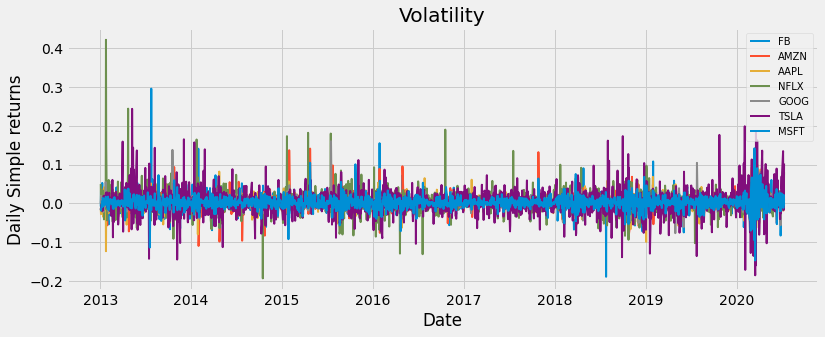

In [17]:
# Visualize the stock daily simple returns

plt.figure(figsize=(12, 4.5))

# Lopp through each stock and plot the simple returns

for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw=2, label=c)

# Create a legend

plt.legend(loc='upper right', fontsize=10)
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Daily Simple returns')
plt.show()

In [19]:
# Show the mean of the daily simple returns

dailyMeanSimpleReturns = daily_simple_returns.mean()
dailyMeanSimpleReturns

Symbols
FB      0.001375
AMZN    0.001515
AAPL    0.001063
NFLX    0.002380
GOOG    0.000895
TSLA    0.002576
MSFT    0.001307
dtype: float64

In [23]:
# Calculate the expected portfolio daily returns

randomWeights = np.array([0.1, 0.3, 0.2, 0.1, 0.1, 0.1, 0.1]) # 10% FB, 30% AMZN, 20% AAPL, 10% NFLX, 10% GOOG, 10% TSLA, 20% MSFT
portfolioSimpleReturns = np.sum(dailyMeanSimpleReturns * randomWeights)

portfolioSimpleReturns

0.0015199652524482638

In [26]:
# Get the yearly simple returns

print('Expected annualized portfolio simple returns: ' + str(portfolioSimpleReturns * 253 * 100) + '%')

Expected annualized portfolio simple returns: 38.455120886941074%


In [28]:
# Calculate the growth of the investment

dailyCumulSimpleReturn = (daily_simple_returns + 1).cumprod()

dailyCumulSimpleReturn


Symbols,FB,AMZN,AAPL,NFLX,GOOG,TSLA,MSFT
Date,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987377,1.049777,1.000581,0.983314,0.986604
2013-01-04,1.027143,1.007151,0.959874,1.043147,1.020353,0.972851,0.968139
2013-01-07,1.050714,1.043333,0.954228,1.078144,1.015900,0.971154,0.966329
2013-01-08,1.037857,1.035249,0.956797,1.055972,1.013896,0.952489,0.961260
...,...,...,...,...,...,...,...
2020-07-06,8.581429,11.880767,5.457497,37.568415,4.151555,38.789025,9.043829
2020-07-07,8.602143,11.659555,5.440563,37.518964,4.122356,39.305994,8.938669
2020-07-08,8.699286,11.974312,5.567274,38.250841,4.152388,38.627828,9.135255


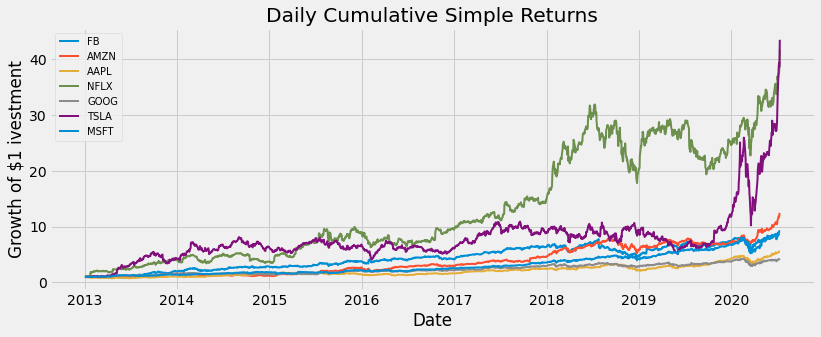

In [31]:
# Visualize daily cumulative simple returns

plt.figure(figsize=(12.2, 4.5))
for c in dailyCumulSimpleReturn.columns.values:
    plt.plot(dailyCumulSimpleReturn.index, dailyCumulSimpleReturn[c], lw=2, label=c)

plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Date')
plt.ylabel('Growth of $1 ivestment')
plt.title('Daily Cumulative Simple Returns')
plt.show()